# BeeData - Competição Interna, "Titanic"

texto texto

## Importa as bibliotecas que vão ser usadas

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler

plt.style.use("ggplot")

## Analise explorátoria dos dados

### Lendo os dados do arquivo .csv

In [64]:
# Primeio vamos ler os dados de conjunto de treino e posteriormente fazermos uma analíse a partir deles
data = pd.read_csv("data/train.csv")

data.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Análise inicial

As colunas do dataset representam as seguintes informações:

- `PassangerID`: id do passageiro.
- `Survived`: indica se o passageiro sobrevivou à tragédia (a coluna que queremos fazer predição), a coluna usa 1 para caso tenha sobrevivido e 0 para não.
- `Pclass`: classe do ticket (1 = primeira classe, 2 = segunda classe, 3 = terceira classe), usada para representar um "status socio-econômico".
- `Sex`: sexo do passageiro (male ou female).
- `Age`: idade em anos.
- `SibSp`: número de irmãos do passegeiro `/` quantidade de conjugê dentro do navio.
- `Parch`: número de parentes `/` crianças dentrod do navio.
- `Ticket`: número do ticket.
- `Fare`: tarifa do passegiro.
- `Cabin`: número da cabine.
- `Embarked`: porto em que o passegeiro usou para embarcar (C = Cherbourg, Q = Queenstown, S = Southampton, NaN = Desconhecido).

Vamos verificar a quantidade de valores nulos presentes no dataset.

In [65]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Antes de fazer uma analise com gráficos e verificar as estatísticas dos dados, primeiro vamos tratar algumas colunas.

1. Tratar o atributo `Embarked`.
2. Tratar o atributo `Cabin`.
3. Tratar o atributo `Age`.
4. O atributo `Name` vai ser tratado posteriormente.
5. O atributo `Ticket` vai ser tratado posteriormente.
6. Remover o atributo `PassengerId`.

#### 1. Tratar o atributo `Embarked`.

In [66]:
# Primeiro vamos verificar os possíveis valores em que se pode ter no atributo "Embarked"

data["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [67]:
# Substituindo os valores com "NaN" em uma string "U - Unknown"

data["Embarked"] = data["Embarked"].fillna("U")

data["Embarked"].unique()

array(['S', 'C', 'Q', 'U'], dtype=object)

In [68]:
# Agora fazemos a contagem de valores NaN no atributo

data["Embarked"].value_counts()

S    644
C    168
Q     77
U      2
Name: Embarked, dtype: int64

Como a quantidade de valores com NaN não é expressiva no nosso dataset poderiamos simplesmente remover esses valores ou trocar pela moda, para isso vamos fazer uma analíse sobre os valores do atributo.

In [69]:
# Função para mostrar o gráfico de barras da taxa de sobrevivência de um atributo

def mostrar_grafico_de_barras_txsob(data, atributo, show = True, label_enconder_usado = False):
    X = data[data.Survived == 1][atributo].value_counts().div(data[atributo].value_counts(), fill_value = 0)

    if label_enconder_usado:
        sns.barplot(label_enconder_usado.inverse_transform(list(X.index)), list(np.array(X)))
    else:
        sns.barplot(list(X.index), list(np.array(X)))

    plt.title("Taxa de sobrevivência do atributo {}".format(atributo))
    plt.xlabel("Valor de {}".format(atributo))
    plt.ylabel("Taxa de sobrevivência")

    if show:
        plt.show()
    

In [70]:
# Função para mostrar o gráfico de barras da quantidade de valores em um atributo

def mostrar_grafico_de_barras_count(data, atributo, show = True, label_enconder_usado = False):
    X = data[atributo].value_counts()

    if label_enconder_usado:
        sns.barplot(label_enconder_usado.inverse_transform(list(X.index)), list(np.array(X)))
    else:
        sns.barplot(list(X.index), list(np.array(X)))

    plt.title("Contagem de valores do atributo {}".format(atributo))
    plt.xlabel("Valor de {}".format(atributo))
    plt.ylabel("Quantidade")

    if show:
        plt.show()

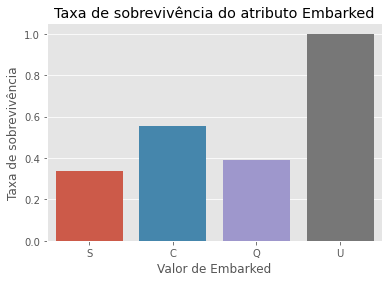

In [71]:
mostrar_grafico_de_barras_txsob(data, "Embarked")

Vendo pelo gráfico, podemos ver que os valroes nulos na taxa de Embarked possuem uma alta taxa de sobrevivência, para evitar que possamos enviesar o classificador com esses valores vamos tornar eles na moda do atributo `Embarked`, ou seja, "U -> S".

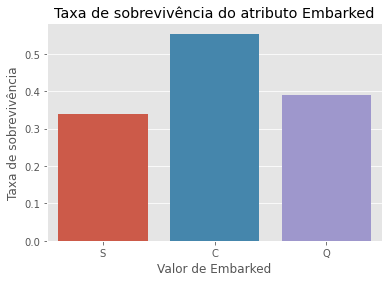

In [72]:
data["Embarked"] = data["Embarked"].replace("U", "S")

mostrar_grafico_de_barras_txsob(data, "Embarked")

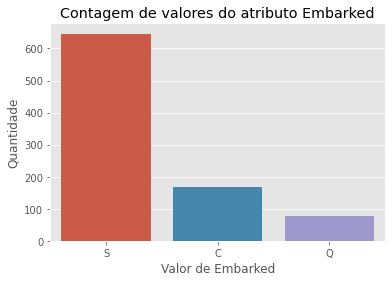

In [73]:
mostrar_grafico_de_barras_count(data, "Embarked")

Pensar sobre:
- Será se uma é uma boa ideia transformar os valores de "Q -> S", dado que temos poucas observações no atributo com o valor Q?

#### 2 - Tratar o atributo `Cabin` .

In [74]:
print("Número de observações: {}".format(data.shape[0]))
print("Número de NaN em cabin {}".format(data["Cabin"].isnull().sum()))
print("Porcentagem de valores NaN: {:.2f}".format(data["Cabin"].isnull().sum() / data.shape[0]))

Número de observações: 891
Número de NaN em cabin 687
Porcentagem de valores NaN: 0.77


Temos 77% dos valores do atributo `Cabin` como nulos, mas talvez eles sejam importantes para a nossa como segue a imagem abaixo:

<img src="https://upload.wikimedia.org/wikipedia/commons/8/84/Titanic_cutaway_diagram.png" width="400" height="400" />

Então vamos fazer o seguinte:
- Para os campos nulos vamos colocar a letra `U - Unknown`.
- Para os campos não nulos vamos pegar apenas a primeira letra (já que ela representa a localização da cabine).

In [75]:
# Trata os valores nulos como "U - Unknown"
data["Cabin"] = data["Cabin"].fillna("U")
# Os valores atuais já presentes no atributo são trocados pela sua letra inicial (representando o andar da cabine)
data["Cabin"] = data["Cabin"].apply(lambda x: x[0])

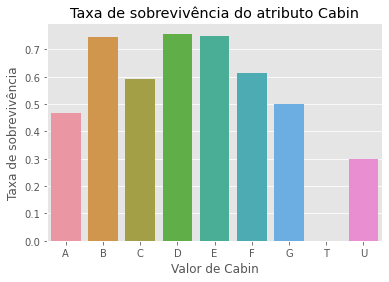

In [76]:
mostrar_grafico_de_barras_txsob(data, "Cabin")

In [77]:
data["Cabin"].value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

Podemos ver pelo gráfico de barras que talvez o atributo `Cabin` (da forma que foi tratado) não nos dá muita informação se um passageiro sobreviveu.

#### 3. Tratar o atributo `Age`.

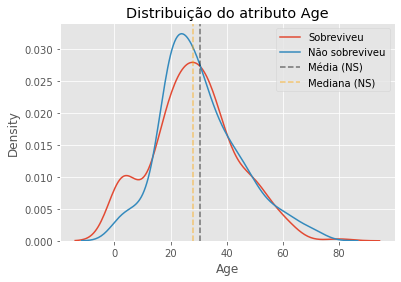

In [81]:
sns.kdeplot(data["Age"][data["Survived"] == 1], label = "Sobreviveu")
#plt.axvline(data["Age"][data["Survived"] == 1].mean(), label = "Média (S)", linestyle = "--", color = "black", alpha = 0.5)
#plt.axvline(data["Age"][data["Survived"] == 1].median(), label = "Mediana (S)", linestyle = "--", color = "orange", alpha = 0.5)

sns.kdeplot(data["Age"][data["Survived"] == 0], label= "Não sobreviveu")
plt.axvline(data["Age"][data["Survived"] == 0].mean(), label = "Média (NS)", linestyle = "--", color = "black", alpha = 0.5)
plt.axvline(data["Age"][data["Survived"] == 0].median(), label = "Mediana (NS)", linestyle = "--", color = "orange", alpha = 0.5)

plt.title("Distribuição do atributo Age")
plt.legend()

plt.show()

Vamos tratar o atributo `Age` como se fosse Gaussino, então para tratar os valores nulos nele, vamos trocar pela média do atributo.

In [17]:
data["Age"][data["Survived"] == 1] = data["Age"][data["Survived"] == 1].fillna(data["Age"][data["Survived"] == 1].mean())
data["Age"][data["Survived"] == 0] = data["Age"][data["Survived"] == 0].fillna(data["Age"][data["Survived"] == 0].mean())

data["Age"].isna().sum()

0

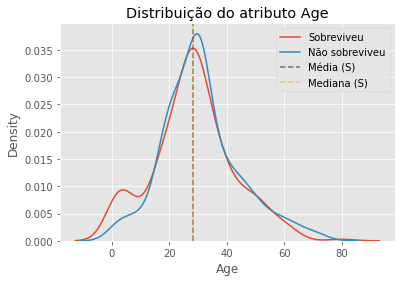

In [62]:
sns.kdeplot(data["Age"][data["Survived"] == 1], label = "Sobreviveu")
sns.kdeplot(data["Age"][data["Survived"] == 0], label= "Não sobreviveu")

plt.title("Distribuição do atributo Age")
plt.legend()

plt.show()

#### 4. O atributo `Name` vai ser tratado posteriormente.

Como o atributo `Name` vai ser utilizado apenas posteriormente, vamos remover ele temporiamente do nosso dataset.

In [19]:
data_name = data["Name"]

data_name.head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [20]:
data = data.drop("Name", 1)

data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,U,S
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C,C
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,female,35.000000,1,0,113803,53.1000,C,S
4,5,0,3,male,35.000000,0,0,373450,8.0500,U,S
5,6,0,3,male,30.626179,0,0,330877,8.4583,U,Q
6,7,0,1,male,54.000000,0,0,17463,51.8625,E,S
7,8,0,3,male,2.000000,3,1,349909,21.0750,U,S
8,9,1,3,female,27.000000,0,2,347742,11.1333,U,S
9,10,1,2,female,14.000000,1,0,237736,30.0708,U,C


#### 5. O atributo `Ticket` vai ser tratado posteriormente.

In [21]:
data_ticket = data["Ticket"]

data_ticket.head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [22]:
data = data.drop("Ticket", 1)

data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,U,S
1,2,1,1,female,38.000000,1,0,71.2833,C,C
2,3,1,3,female,26.000000,0,0,7.9250,U,S
3,4,1,1,female,35.000000,1,0,53.1000,C,S
4,5,0,3,male,35.000000,0,0,8.0500,U,S
5,6,0,3,male,30.626179,0,0,8.4583,U,Q
6,7,0,1,male,54.000000,0,0,51.8625,E,S
7,8,0,3,male,2.000000,3,1,21.0750,U,S
8,9,1,3,female,27.000000,0,2,11.1333,U,S
9,10,1,2,female,14.000000,1,0,30.0708,U,C


#### 6. Remover o atributo `PassengerId`

Vamos remover esse atributo do dataset dado que ele não nos dar informações sobre as observações.

In [23]:
data = data.drop("PassengerId", axis = 1)

In [24]:
print("Quantidade dados duplicados:", len(data) - len(data.drop_duplicates()))

Quantidade dados duplicados: 107


In [25]:
# Vamos remover as observações duplicadas

data = data.drop_duplicates()

Agora vamos gerar um report do dados processados.

In [26]:
profile = ProfileReport(data, title = "Pandas Profiling Report")

profile.to_file("report-1.html")

### Gerando mais gráficos

#### Gráficos de barras para os atributos categóricas

Vamos gerar gráficos de barras para os atributos categóricas, para visualizar elas em relação a taxa de sobrevivência.

In [27]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

##### Taxa de sobrevivência

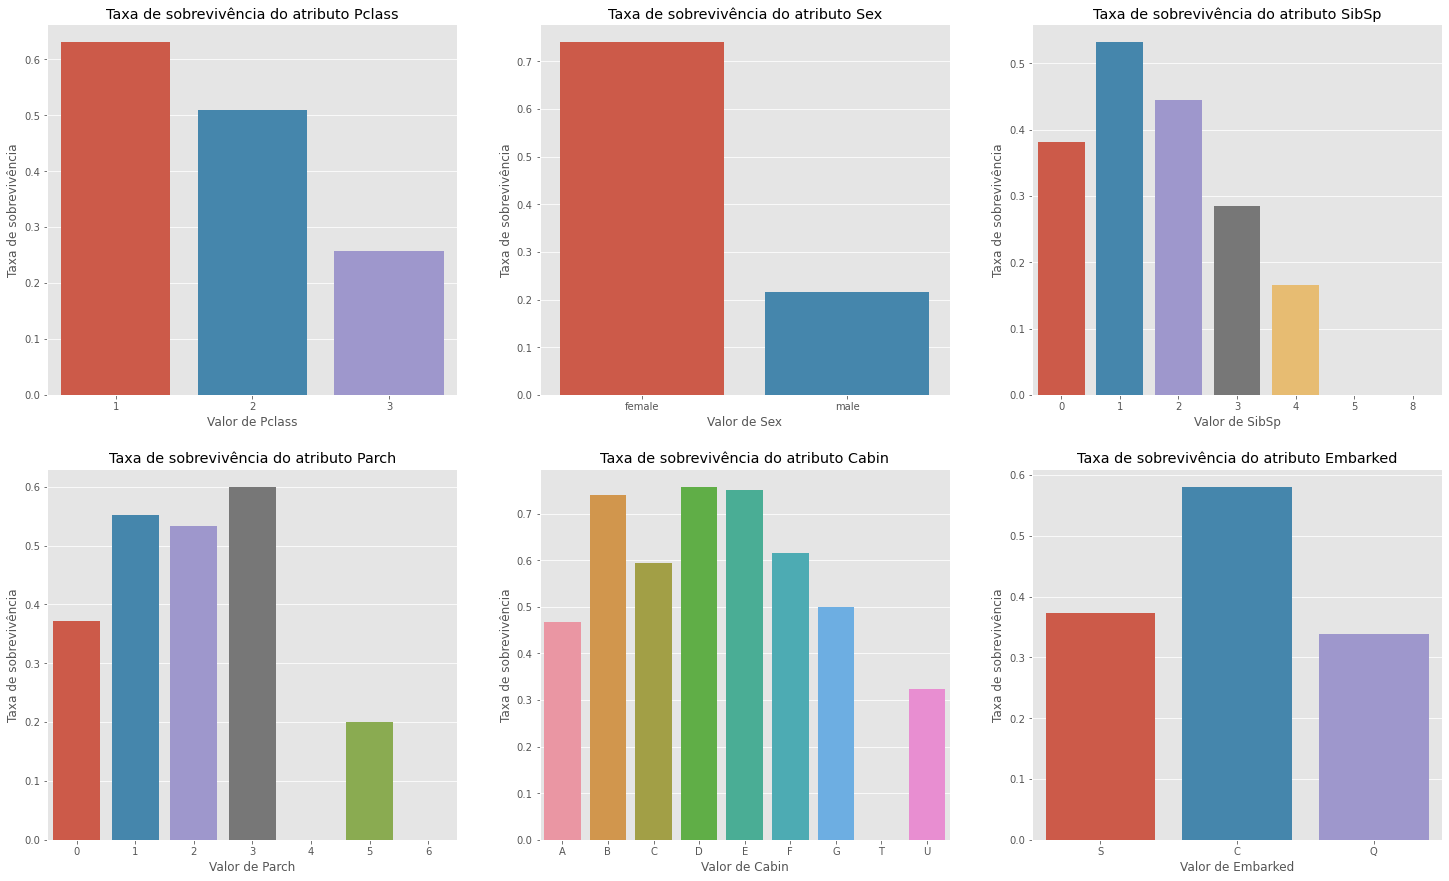

In [28]:
atributos_categoricos = ["Pclass", "Sex", "SibSp", "Parch", "Cabin", "Embarked"]
plt.figure(figsize = (25, 15))
plt_i = 1

for atributo in atributos_categoricos:
    plt.subplot(2, 3, plt_i)

    mostrar_grafico_de_barras_txsob(data, atributo, False)

    plt_i = plt_i + 1

plt.show()

##### Contagem de valores

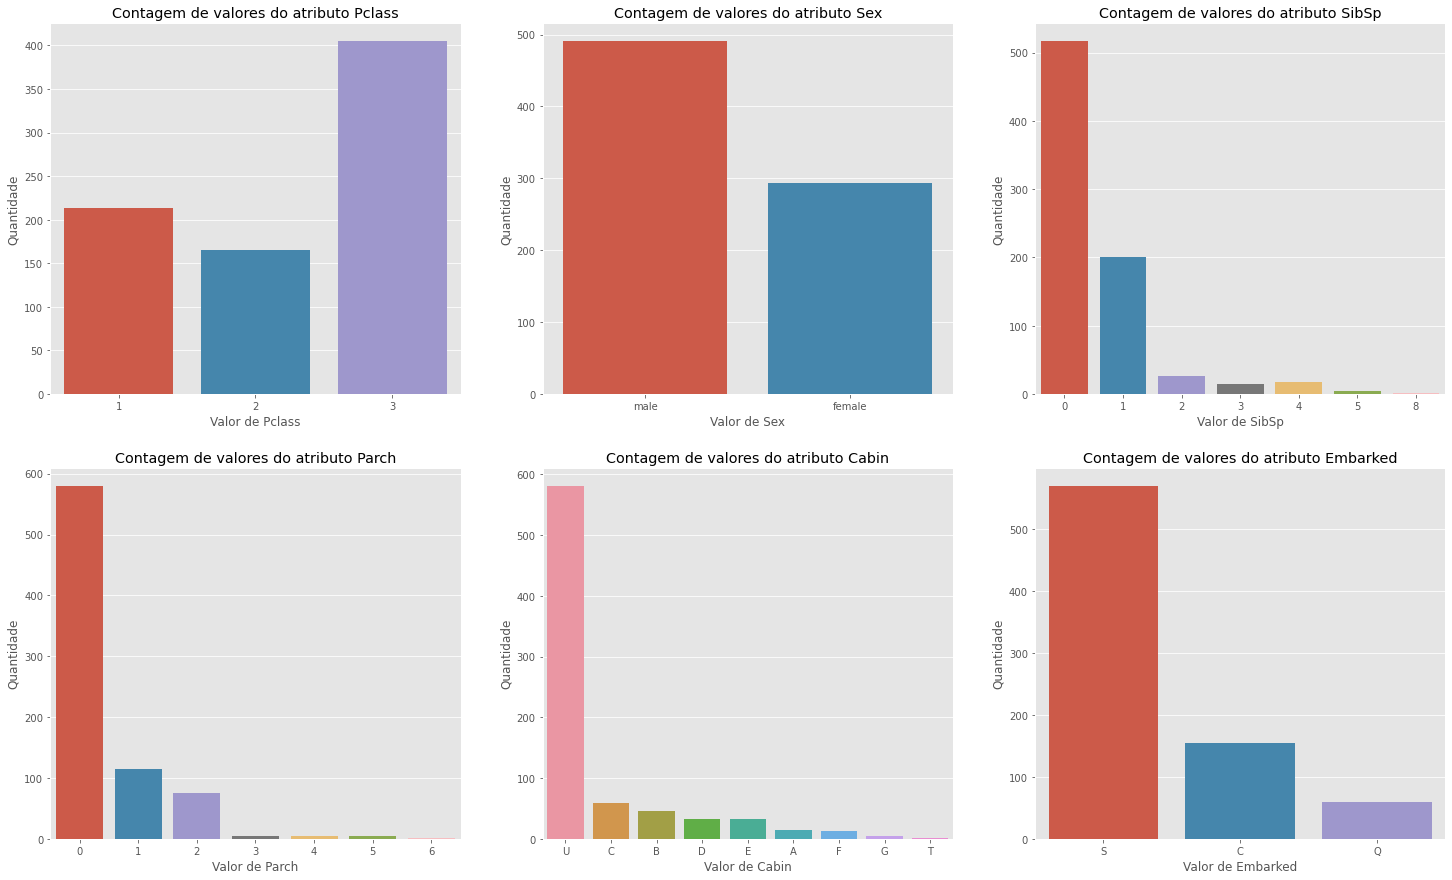

In [29]:
atributos_categoricos = ["Pclass", "Sex", "SibSp", "Parch", "Cabin", "Embarked"]
plt.figure(figsize = (25, 15))
plt_i = 1

for atributo in atributos_categoricos:
    plt.subplot(2, 3, plt_i)

    mostrar_grafico_de_barras_count(data, atributo, False)

    plt_i = plt_i + 1

plt.show()

Desse gráfico podemos notar pontos importantes:
- No atributo `Pclass`:
- - A primeira classe sobreviveu muito mais que a terceira.
- No atributo `Cabin`:
- - Os valores com "U - Unknown" em `Cabin`, possuem uma pequena taxa de sobrevivência em relação aos demais.
- - O valor "T" no atributo possui uma taxa de sobreviência como 0, porém ele apenas possui uma observação com esse valor, pode ser interessante trocar ele pela moda.
- - Como nesse atributo os valores diferentes de "U" possuem muitas poucas observações podemos pensar em gerar um novo atributo.
- No atributo `SibSp` e `Parch`:
- - Podemos criar um novo atributo para ambos criando intervalos para representar a quantidade de filhos/parentes em labels: `Low, medium, high`.

Vamos observar alguns gráficos do atributo Pclass em relação ao atributo Fare, já que possuem uma alta correlaçaõ (dada pelo report-1).

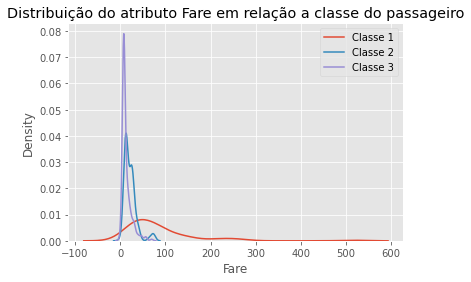

In [30]:
sns.kdeplot(data["Fare"][data["Pclass"] == 1], label = "Classe 1")
sns.kdeplot(data["Fare"][data["Pclass"] == 2], label = "Classe 2")
sns.kdeplot(data["Fare"][data["Pclass"] == 3], label = "Classe 3")

plt.title("Distribuição do atributo Fare em relação a classe do passageiro")
plt.legend()

plt.show()

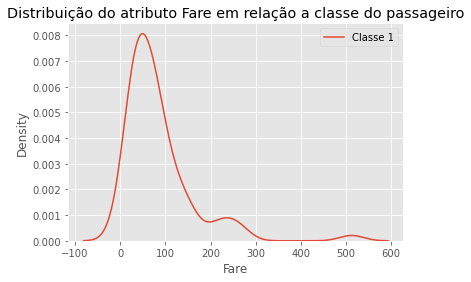

In [31]:
sns.kdeplot(data["Fare"][data["Pclass"] == 1], label = "Classe 1")

plt.title("Distribuição do atributo Fare em relação a classe do passageiro")
plt.legend()

plt.show()

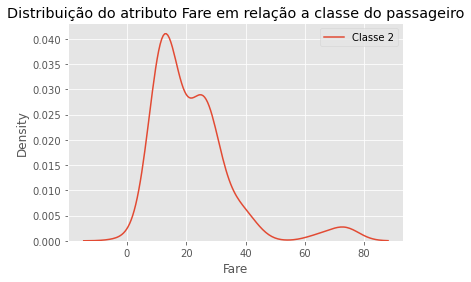

In [32]:
sns.kdeplot(data["Fare"][data["Pclass"] == 2], label = "Classe 2")

plt.title("Distribuição do atributo Fare em relação a classe do passageiro")
plt.legend()

plt.show()

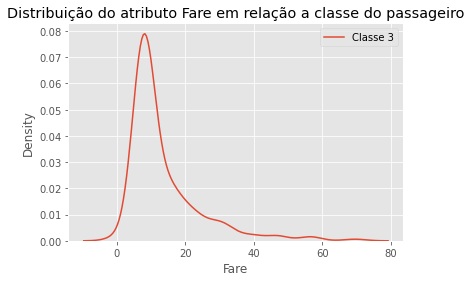

In [33]:
sns.kdeplot(data["Fare"][data["Pclass"] == 3], label = "Classe 3")

plt.title("Distribuição do atributo Fare em relação a classe do passageiro")
plt.legend()

plt.show()

Podemos ver pelos gráficos mostrados que a `Fare` paga pelo passageiro vai variar de acordo com a classe dele, então podemos pensar em um novo atributo:
- Um atributo que faz a diferença da `Fare` paga pelo passageiro pela mediana da classe (dado que possuimos outliers no atributo).

In [34]:
dif_f_p3 = data["Fare"][data["Pclass"] == 3].sub(data["Fare"][data["Pclass"] == 3].median()).to_frame(name = "difFare")

dif_f_p3

,difFare
0,-0.8000
2,-0.1250
4,0.0000
5,0.4083
7,13.0250
...,...
881,-0.1542
882,2.4667
885,21.0750
888,15.4000


In [35]:
dif_f_p2 = data["Fare"][data["Pclass"] == 2].sub(data["Fare"][data["Pclass"] == 2].median()).to_frame(name = "difFare")

dif_f_p2

,difFare
9,11.3208
15,-2.7500
17,-5.7500
20,7.2500
21,-5.7500
...,...
865,-5.7500
866,-4.8917
874,5.2500
880,7.2500


In [36]:
dif_f_p1 = data["Fare"][data["Pclass"] == 1].sub(data["Fare"][data["Pclass"] == 1].median()).to_frame(name = "difFare")

dif_f_p1

,difFare
1,10.9958
3,-7.1875
6,-8.4250
11,-33.7375
23,-24.7875
...,...
871,-7.7333
872,-55.2875
879,22.8708
887,-30.2875


In [37]:
data_dif_fare = pd.concat([dif_f_p1, dif_f_p2, dif_f_p3], axis = 0).sort_index()

data_dif_fare

,difFare
0,-0.8000
1,10.9958
2,-0.1250
3,-7.1875
4,0.0000
...,...
885,21.0750
887,-30.2875
888,15.4000
889,-30.2875


In [38]:
data_difFare = data.merge(data_dif_fare, left_index = True, right_index = True)

data_difFare

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,difFare
0,0,3,male,22.000000,1,0,7.2500,U,S,-0.8000
1,1,1,female,38.000000,1,0,71.2833,C,C,10.9958
2,1,3,female,26.000000,0,0,7.9250,U,S,-0.1250
3,1,1,female,35.000000,1,0,53.1000,C,S,-7.1875
4,0,3,male,35.000000,0,0,8.0500,U,S,0.0000
...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250,U,Q,21.0750
887,1,1,female,19.000000,0,0,30.0000,B,S,-30.2875
888,0,3,female,30.626179,1,2,23.4500,U,S,15.4000
889,1,1,male,26.000000,0,0,30.0000,C,C,-30.2875


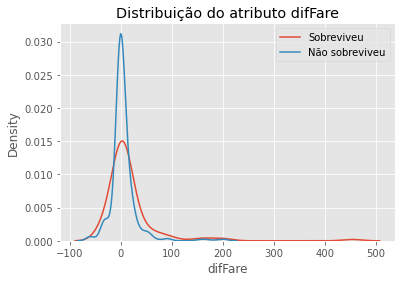

In [39]:
sns.kdeplot(data_difFare["difFare"][data_difFare["Survived"] == 1], label = "Sobreviveu")
sns.kdeplot(data_difFare["difFare"][data_difFare["Survived"] == 0], label = "Não sobreviveu")

plt.title("Distribuição do atributo difFare")
plt.legend()

plt.show()

Conseguimos criar um novo atributo para que possamos testar o modelo nele, ainda há um ponto interessante sobre o atributo Fare sendo:
- Seria interessante tentar retirar os outliers desse atributo para verificar se conseguimos uma distribuição próxima da normal, assim conseguiriamos aplicar classificadores, como: naive bayes.

Agora vamos criar os novos atributos conténdo informações de `SibSp` e `Parch`:
- No atributo `SibSp`, vamos considerar os intervalos: $[0, 1]$ para Low, $[2, 3]$ para medium e $[4, 10]$ para high.
- No atributo `Parch`, vamos considerar os intervalos: $[0, 1]$ para Low, $[2, 3]$ para medium e $[4, 10]$ para high.

In [102]:
data_difFare["SibSp_I"] = pd.cut(data_difFare["SibSp"], bins = pd.IntervalIndex.from_tuples([(0, 1), (2, 3), (4, 10)], closed = "both")).astype(str).replace("[0, 1]", "L").replace("[2, 3]", "M").replace("[4, 10]", "H")

data_difFare

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,difFare,SibSp_I
0,0,3,male,22.000000,1,0,7.2500,U,S,-0.8000,L
1,1,1,female,38.000000,1,0,71.2833,C,C,10.9958,L
2,1,3,female,26.000000,0,0,7.9250,U,S,-0.1250,L
3,1,1,female,35.000000,1,0,53.1000,C,S,-7.1875,L
4,0,3,male,35.000000,0,0,8.0500,U,S,0.0000,L
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250,U,Q,21.0750,L
887,1,1,female,19.000000,0,0,30.0000,B,S,-30.2875,L
888,0,3,female,30.626179,1,2,23.4500,U,S,15.4000,L
889,1,1,male,26.000000,0,0,30.0000,C,C,-30.2875,L


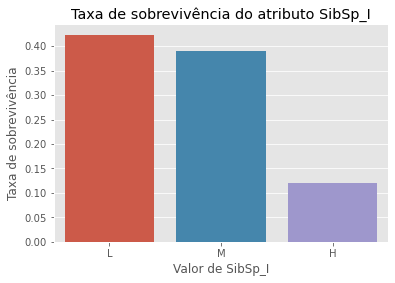

In [105]:
mostrar_grafico_de_barras_txsob(data_difFare, "SibSp_I")

In [103]:
data_difFare["Parch_I"] = pd.cut(data_difFare["Parch"], bins = pd.IntervalIndex.from_tuples([(0, 1), (2, 3), (4, 10)], closed = "both")).astype(str).replace("[0, 1]", "L").replace("[2, 3]", "M").replace("[4, 10]", "H")

data_difFare

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,difFare,SibSp_I,Parch_I
0,0,3,male,22.000000,1,0,7.2500,U,S,-0.8000,L,L
1,1,1,female,38.000000,1,0,71.2833,C,C,10.9958,L,L
2,1,3,female,26.000000,0,0,7.9250,U,S,-0.1250,L,L
3,1,1,female,35.000000,1,0,53.1000,C,S,-7.1875,L,L
4,0,3,male,35.000000,0,0,8.0500,U,S,0.0000,L,L
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250,U,Q,21.0750,L,H
887,1,1,female,19.000000,0,0,30.0000,B,S,-30.2875,L,L
888,0,3,female,30.626179,1,2,23.4500,U,S,15.4000,L,M
889,1,1,male,26.000000,0,0,30.0000,C,C,-30.2875,L,L


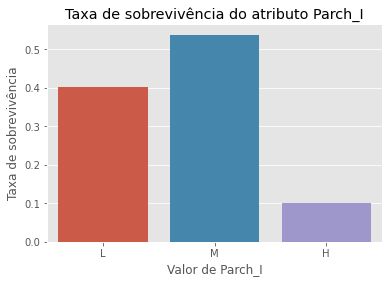

In [106]:
mostrar_grafico_de_barras_txsob(data_difFare, "Parch_I")

In [104]:
profile = ProfileReport(data_difFare, title = "Pandas Profiling Report")

profile.to_file("report-2.html")

## Transformando o modelo de test

Agora que temos o modelo de train com algumas das suas features, podemos começar a criar um modelo, mas antes vamos também transformar os dados de teste.


In [41]:
data_teste = pd.read_csv("data/test.csv")

data_teste

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [42]:
data_teste.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Lista de tarefas para dataset de teste

Precisamos processar os dados de teste como foram processados os de treino, a lista de tarefas é a seguinte:

- [ ] Dropar os atributos: `Name, Ticket`
- [ ] Tratar os valores nulos em: `Age, Fare, Cabin`
- [ ] Criar o novo atributo `difFare` com base no conjunto de treino.
- [ ] Criar os novos atributos `SibSp_I` e `Parch_I`.

#### Dropando colunas que não serão usadas

In [43]:
data_teste = data_teste.drop(["Name", "Ticket"], axis = 1)

data_teste

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,NaN,Q
1,893,3,female,47.0,1,0,7.0000,NaN,S
2,894,2,male,62.0,0,0,9.6875,NaN,Q
3,895,3,male,27.0,0,0,8.6625,NaN,S
4,896,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,NaN,S
414,1306,1,female,39.0,0,0,108.9000,C105,C
415,1307,3,male,38.5,0,0,7.2500,NaN,S
416,1308,3,male,NaN,0,0,8.0500,NaN,S


#### Tratando os valores nulos em `Age`

In [44]:
data_teste["Age"] = data_teste["Age"].fillna(data_difFare["Age"].mean())

data_teste["Age"].isna().sum()

0

#### Tratando os valores nulos em `Fare`
Como só temos um valor nulo nesse atributo vamos tratar ele usando a mediana do conjunto de treino.

In [45]:
data_teste["Fare"] = data_teste["Fare"].fillna(data_difFare["Fare"].median())

data_teste["Fare"].isna().sum()

0

#### Tratando os valores nulos em `Cabin`

In [46]:
# Trata os valores nulos como "U - Unknown"
data_teste["Cabin"] = data_teste["Cabin"].fillna("U")
# Os valores atuais já presentes no atributo são trocados pela sua letra inicial (representando o andar da cabine)
data_teste["Cabin"] = data_teste["Cabin"].apply(lambda x: x[0])

data_teste["Cabin"].isna().sum()

0

In [47]:
data_teste.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Criar o novo atributo difFare com base no conjunto de treino.

In [48]:
dift_f_p3 = data_teste["Fare"][data_teste["Pclass"] == 3].sub(data["Fare"][data["Pclass"] == 3].median()).to_frame(name = "difFare")

dift_f_p3

,difFare
0,-0.2208
1,-1.0500
3,0.6125
4,4.2375
5,1.1750
...,...
412,-0.2750
413,0.0000
415,-0.8000
416,0.0000


In [49]:
dift_f_p2 = data_teste["Fare"][data_teste["Pclass"] == 2].sub(data["Fare"][data["Pclass"] == 2].median()).to_frame(name = "difFare")

dift_f_p2

,difFare
2,-9.0625
7,10.2500
13,7.2500
15,8.9708
16,-6.4000
...,...
387,-5.7500
393,-8.2500
401,2.2500
405,-4.8875


In [50]:
dift_f_p1 = data_teste["Fare"][data_teste["Pclass"] == 1].sub(data["Fare"][data["Pclass"] == 1].median()).to_frame(name = "difFare")

dift_f_p1

,difFare
11,-34.2875
12,21.9792
14,0.8875
20,-0.8875
22,-28.6042
...,...
403,-13.1875
404,-32.5667
407,151.2125
411,29.7125


In [51]:
data_dift_fare = pd.concat([dift_f_p1, dift_f_p2, dift_f_p3], axis = 0).sort_index()

data_dift_fare

,difFare
0,-0.2208
1,-1.0500
2,-9.0625
3,0.6125
4,4.2375
...,...
413,0.0000
414,48.6125
415,-0.8000
416,0.0000


In [52]:
data_teste = data_teste.merge(data_dift_fare, left_index = True, right_index = True)

data_teste

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,difFare
0,892,3,male,34.500000,0,0,7.8292,U,Q,-0.2208
1,893,3,female,47.000000,1,0,7.0000,U,S,-1.0500
2,894,2,male,62.000000,0,0,9.6875,U,Q,-9.0625
3,895,3,male,27.000000,0,0,8.6625,U,S,0.6125
4,896,3,female,22.000000,1,1,12.2875,U,S,4.2375
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,29.858135,0,0,8.0500,U,S,0.0000
414,1306,1,female,39.000000,0,0,108.9000,C,C,48.6125
415,1307,3,male,38.500000,0,0,7.2500,U,S,-0.8000
416,1308,3,male,29.858135,0,0,8.0500,U,S,0.0000


### Criar o novo atributo `SibSp_I` e `Parch_I`

In [107]:
data_teste["SibSp_I"] = pd.cut(data_teste["SibSp"], bins = pd.IntervalIndex.from_tuples([(0, 1), (2, 3), (4, 10)], closed = "both")).astype(str).replace("[0, 1]", "L").replace("[2, 3]", "M").replace("[4, 10]", "H")
data_teste["Parch_I"] = pd.cut(data_teste["Parch"], bins = pd.IntervalIndex.from_tuples([(0, 1), (2, 3), (4, 10)], closed = "both")).astype(str).replace("[0, 1]", "L").replace("[2, 3]", "M").replace("[4, 10]", "H")

data_teste

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,difFare,SibSp_I,Parch_I
0,892,3,male,34.500000,0,0,7.8292,U,Q,-0.2208,L,L
1,893,3,female,47.000000,1,0,7.0000,U,S,-1.0500,L,L
2,894,2,male,62.000000,0,0,9.6875,U,Q,-9.0625,L,L
3,895,3,male,27.000000,0,0,8.6625,U,S,0.6125,L,L
4,896,3,female,22.000000,1,1,12.2875,U,S,4.2375,L,L
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,29.858135,0,0,8.0500,U,S,0.0000,L,L
414,1306,1,female,39.000000,0,0,108.9000,C,C,48.6125,L,L
415,1307,3,male,38.500000,0,0,7.2500,U,S,-0.8000,L,L
416,1308,3,male,29.858135,0,0,8.0500,U,S,0.0000,L,L


## Salva as transformações efetuadas

In [108]:
data_difFare.to_csv("data/train-tratado.csv", index = False)

In [109]:
data_teste.to_csv("data/teste-tratado.csv", index = False)